## Methods 2 - the biogeochemical model

The biogeochemical model introduces the following state variables (and the transport model SPBM operates with them):

autotrophs, $\text{Phy}\ \lbrack\text{mg C m}^{- 3}\rbrack$;
heterotrophs, $\text{Het}\ \lbrack\text{mg C m}^{- 3}\rbrack$;
$\text{NH}_{4}^{+}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{NO}_{2}^{-}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{NO}_{3}^{-}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{Si}\ \lbrack\text{mM Si m}^{- 3}\rbrack$;
$\text{PO}_{4}^{3 -}\ \lbrack\text{mM P m}^{- 3}\rbrack$;
$\text{O}_{2}\ \lbrack\text{mM O}_{2}\ \text{m}^{- 3}\rbrack$;
$\text{SO}_{4}^{2 -}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$\text{S}_{2}\text{O}_{3}^{2 -}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$\text{S}^{0}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$\text{H}_{2}\text{S}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
dissolved inorganic carbon, $\text{DIC}\ \lbrack\text{mM C m}^{- 3}\rbrack$;
particulate OM ($\text{POM}\ \lbrack\text{mg C m}^{- 3}\rbrack$);
dissolved OM ($\text{DOM}\ \lbrack\text{mg C m}^{- 3}\rbrack$);
$\text{TA}\ \lbrack\text{mM}\ m^{- 3}\rbrack$.

$\text{POM}$ and $\text{DOM}$ have a Redfield stoichiometry of $106\text{C}:16\text{N}:1\text{P}$.
Each time step, the biogeochemical model takes the concentrations of state variables from the transport model SPBM from the previous time step and calculates the state variables concentration increments.
Then the biogeochemical model sends these increments calculated for every layer back to the transport model SPBM.
The biogeochemical model does not distinguish the water column from sediments; the parametrization is the same for all layers in both the water column and sediments.
State variables increments are calculated according due to specific biogeochemical processes.
For example, $\delta\lbrack\text{Phy}\rbrack = \text{Phy}_{\text{growth}} - \text{Phy}_{\text{mortality}} - \text{Phy}_{\text{excrete}} - \text{Het}_{\text{grazing-phy}}$.
So an increment of the autotrophs state variable is calculated as an increase from autotrophs' growth and decrease from autotrophs' mortality, excretion, and heterotrophs grazing on autotrophs.
Here we describe the processes contributing to the state variables increments separating them into groups: Phototrophic producers, Heterotrophs, Organic matter degradation, Nitrogen cycle, Sulfur cycle.
Then we provide the resulting increments of state variables due to described processes in the Mass Balance equations subsection.

### Phototrophic producers

Phototrophic producers' growth $\text{Phy}_{\text{growth}} = \mu \cdot \lbrack\text{Phy}\rbrack$ is parametrized according to the empirical equation that describes the phytoplankton daily specific growth rate $\mu\ \lbrack d^{- 1}\rbrack$ as a function of the specific photosynthetic rate of biomass
$P^{B}\ \lbrack{\text{mg C (mg Chl a d)}}^{- 1}\rbrack$ and the $\frac{Chl a}{C}$ ratio $\lbrack{\text{mg Chl a (mg C)}}^{- 1}\rbrack$ [(Cloern et al., 1995)]:

[(Cloern et al., 1995)]: https://doi.org/10.4319/lo.1995.40.7.1313

$\mu = 0.85P^{B}\frac{Chl a}{C} - 0.015$,

$P^{B} = Dp_{m}^{B}(1 - \exp\frac{I_{t}\alpha}{p_{m}^{B}})$,

$\frac{Chl a}{C} = 0.003 + 0.0154e^{0.050T}e^{- 0.059I}\tau$.

$D$ is the photoperiod [h] , calculated according to [(Fennel and Neumann, 2014)],
$p_{m}^{B}$ is the maximum hourly rate of photosynthesis normalized to chlorophyll biomass $\lbrack\text{mg C}\ (\text{mg}\ \text{Chl a h})^{- 1}\rbrack$,
$I_{t}$ is the instantaneous photosynthetically active radiation ($\text{PAR}$) $\lbrack\mu\text{M quanta m}^{- 2}\ s^{- 1}\rbrack$,
and $\alpha$ defines photosynthetic efficiency at low irradiance $\lbrack\text{mg C}\ (\text{mg}\ \text{Chl a}\ \text{h})^{- 1}\ (\mu \text{M}\ \text{quanta m}^{- 2}\ \text{s}^{- 1})^{- 1}\rbrack$.
$T$ is the temperature $\lbrack^{\circ}\text{C}\rbrack$,
$I$ is the daily irradiance $\lbrack\text{M quanta m}^{- 2}\ \text{d}^{- 1}\rbrack$,
and $\tau$ is the nutrient-limited growth rate $\lbrack \text{d}^{- 1}\rbrack$.

$\tau = \tau_{N}\tau_{\text{Si}}\tau_{PO_{4}^{3 -}}$ where 
$\tau_{N}$ is the nitrogen-limited growth rate,
$\tau_{\text{Si}}$ is the silicon-limited growth rate,
and $\tau_{P}$ is the phosphorus-limited growth rate: $\tau_{N} = \tau_{NH_{4}^{+}} + \tau_{NO_{x}}$,

$\tau_{NH_{4}^{+}} = f_{r}(Ks_{NH_{4}^{+}},\lbrack$NH$_{4}^{+}\rbrack)$,

$\tau_{NO_{x}} = f_{r}(Ks_{NO_{x}},\lbrack\text{NO}_{2}^{-}\rbrack + \lbrack\text{NO}_{3}^{-}\rbrack) \cdot f_{i} (Ks_{NH_{4}^{+}},\lbrack\text{NH}_{4}^{+}\rbrack)$;

$\tau_{\text{Si}} = f_{r}(Ks_{\text{Si}},\lbrack$Si$\rbrack)$;

$\tau_{PO_{4}^{3 -}} = f_{r}(Ks_{PO_{4}^{3 -}},\lbrack$PO$_{4}^{3 -}\rbrack)$.

$f_{r}$ and $f_{i}$ are the sigmoid type functional response and inhibitor function, respectively, of the following forms:

$f_{r}(Ks_{R},R) = \frac{R^{2}}{Ks_{R}^{2} + R^{2}}$ and

$f_{i}(Ks_{R},R) = \frac{Ks_{R}^{2}}{Ks_{R}^{2} + R^{2}}$

where R is the limiting or inhibiting resource concentration and $Ks_{R}$ is the corresponding half-saturation constant.
Therefore, for example in case of high availability of ammonium
($\lbrack\text{NH}_{4}^{+}\rbrack > > Ks_{NH_{4}^{+}}$),
$\tau_{NH_{4}^{+}}$ tends to converge to one while the nitrate and nitrite limiting term $\tau_{NO_{x}}$ inhibited by ammonium tends to converge to zero.

[(Fennel and Neumann, 2014)]: https://www.elsevier.com/books/introduction-to-the-modelling-of-marine-ecosystems/fennel/978-0-444-63363-7

For example, there is a sigmoid type functional response function:

In [1]:
import numpy as np
import src.plot_functions as pf
import src.fetch_data as fd
import src.brom_functions as bf

In [2]:
def sigmoid_powered(ks, r):
    """ks - half-saturation constant
       r  - limiting resource"""
    return np.power(r, 2)/(np.power(ks, 2)+np.power(r, 2))

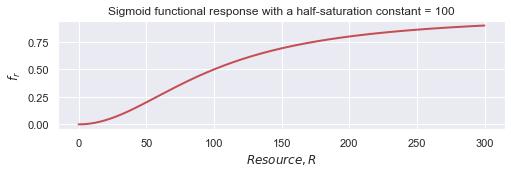

In [3]:
resource = np.arange(0, 300, 0.1)
pf.plot_range('$Resource, R$', '$f_r$',
              'Sigmoid functional response with a half-saturation constant = 100', 
              resource, sigmoid_powered(100, resource))

**Figure M2-1**. Sigmoid functional response.

The sigmoid type functional response function returns values close to 1 when the resource values are much higher than a half-saturation constant, it equals 0.5 when the resource value matches a half-saturation constant value and tends to zero when the resource values are much less than a half-saturation constant.
The sigmoid type inhibitor function is essentially is an inverse of the sigmoid type functional response
($f_i = 1/f_r$).
Using these functions one can regulate the limitation of autotrophs' growth by nutrients.

Let's get some data and check how functional responses and inhibitors would work together.
Here we use the data of an averaged year from the World Ocean Database for a rectangular in the Southern North Sea (see Methods 1 sections) to calculate ammonium $\tau_{NH_{4}^{+}}$, nitrates $\tau_{NO_{x}}$ and a resulting nitrogen $\tau_{N}$ limiters during a year with the half-saturation constants $Ks_{NH_{4}^{+}} = 7$ and $Ks_{NO_{x}}=15$:

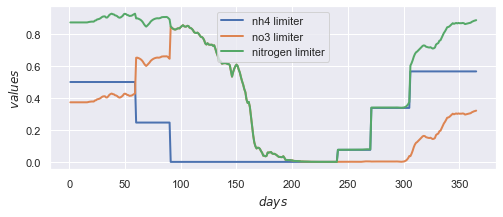

In [4]:
par, temperature, no3, nh4, po4, si, irradiance = fd.get_data()
# the ammonium limiter with a half-saturation constant = 7
nh4_limiter = bf.phy_nh4_limiter(knh4_lim=7, nh4=nh4)
no3_limiter = bf.phy_no3_limiter(knox_lim=15, knh4_lim=7,
                                 no3=no3, no2=0, nh4=nh4)
pf.plot_year_multi((nh4_limiter, 'nh4 limiter'),
                   (no3_limiter, 'no3 limiter'),
                   (no3_limiter+nh4_limiter, 'nitrogen limiter'))

**Figure M2-2A**. Different nutrients limiters.

We see that using the proposed values of the half-saturation constants autotrophs growth is limited by $\text{NO}_{3}^{-}$ in the spring and by $\text{NH}_{4}^{+}$ in the autumn.
Futher we can calculate $\frac{Chl a}{C}$ ratio, the specific photosynthetic rate of biomass $P^{B}$, and finally the daily growth of autotrophs.

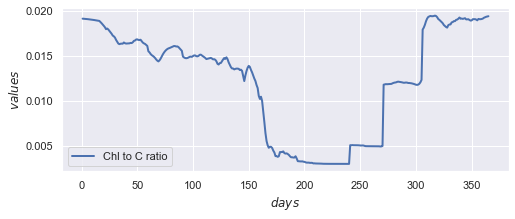

In [5]:
ChlCratio = bf.ChlCratio(temperature, irradiance,
                         no3_limiter+nh4_limiter)
pf.plot_year_multi((ChlCratio, 'Chl to C ratio'))

**Figure M2-2B**. Chl a to C ratio.

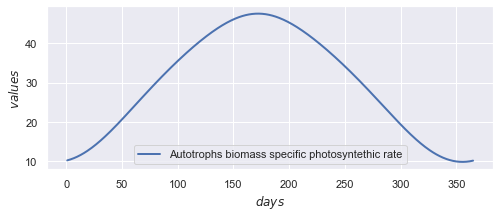

In [6]:
PhyBioRate = bf.phy_biorate(D=bf.photoperiod2(55),
                            pbm=3, alpha=0.09, I=par)
pf.plot_year_multi((PhyBioRate, 'Autotrophs biomass specific photosyntethic rate'))

**Figure M2-2C**. Photosynthetic rate.

In [7]:
def phy_daily_growth(phy_biorate, ChlCratio):
    """
    Coefficiens inside evaluate respiration;
    biorate is the daily rate of photosynthesis,
    [mg C (mg Chl a d)-1]
    """
    answer = 0.85*phy_biorate*ChlCratio-0.015

    return answer

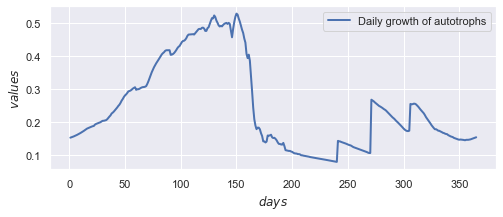

In [8]:
daily_growth = phy_daily_growth(PhyBioRate, ChlCratio)
pf.plot_year_multi((daily_growth, 'Daily growth of autotrophs'))

**Figure M2-3**. Daily growth of autotrophs.

The phototrophic producers excretion is parametrized as
$\text{Phy}_{\text{excrete}} = K_{phy\_ excrete} \cdot \lbrack\text{Phy}\rbrack$
and the phototrophic producers mortality as
$\text{Phy}_{\text{mortality}} = K_{phy\_ mortality} \cdot \lbrack\text{Phy}\rbrack \cdot \lbrack\text{Phy}\rbrack$
where $K_{phy\_ excrete}$ is the phytoplankton excretion coefficient and $K_{phy\_ mortality}$ is the phytoplankton mortality coefficient.

### Heterotrophs

The heterotroph growth parametrization is based on the feeding of heterotrophs on $\text{Phy}$ and $\text{POM}$ following ([Yakushev et al., 2007]) approach, where the carnivore feeding rate depends on the prey to predator ratio:

[Yakushev et al., 2007]: https://doi.org/10.1016/j.marchem.2007.06.003

$\text{Het}_{\text{grazing-phy}} = K_{het\_ phy} \cdot f_{r}(Ks_{het\_ phy\_ ratio},\frac{\lbrack \text{Phy}\rbrack}{\lbrack \text{Het}\rbrack}) \cdot \lbrack\text{Het}\rbrack$,

$\text{Het}_{\text{grazing-pom}} = K_{het\_ pom} \cdot f_{r}(Ks_{het\_ pom\_ ratio},\frac{\lbrack \text{POM}\rbrack}{\lbrack \text{Het}\rbrack}) \cdot \lbrack\text{Het}\rbrack$.

$K_{het\_ phy}$ and $K_{het\_ pom}$ are the coefficients for the feeding of heterotrophs on $\text{Phy}$ and $\text{POM}$, respectively.
$Ks_{het\_ phy\_ ratio}$ and $Ks_{het\_ pom\_ ratio}$ are the half-saturation constants which determine the prey to predator ratio where the consumption rate attains 50$\%$ of its maximal value.
$f_{r}$ is the sigmoid type functional response.

Heterotroph biomass loss consists of respiration and mortality parts:

$\text{Het}_{\text{respiration}} = K_{het\_ respiration} \cdot f_{r\_ hyperbolic}(Ks_{het\_ oxygen},\lbrack \text{O}_{2}\rbrack) \cdot \lbrack\text{Het}\rbrack$,

$\text{Het}_{\text{mortality}} = (K_{het\_ mortality} + f_{i\_ hyperbolic}(Ks_{het\_ oxygen},\lbrack \text{O}_{2}\rbrack) \cdot (1 - K_{het\_ mortality})) \cdot \lbrack\text{Het}\rbrack$.

$f_{r\_ hyperbolic}(Ks_{R},R) = 0.5 + 0.5 \cdot \tanh(R - Ks_{R})$ is the sigmoid hyperbolic type functional response and
$f_{i\_ hyperbolic}(Ks_{R},R) = 0.5 - 0.5 \cdot \tanh(R - Ks_{R})$ is the sigmoid hyperbolic type inhibitor function where $R$ is the limiting or inhibiting resource concentration and $Ks_{R}$ is the corresponding half-saturation constant as introduced previously.
Comparing with the functions $f_{r}$ and $f_{i}$, $f_{r\_ hyperbolic}$ and $f_{i\_ hyperbolic}$ provide a steeper gradient with the resource concentration (R) changing.
$K_{het\_ respiration}$ and $K_{het\_ mortality}$ are the coefficients of heterotroph respiration and mortality, respectively.
Therefore, with sufficient oxygen concentrations ($\lbrack \text{O}_{2}\rbrack > Ks_{het\_ oxygen}$), respiration and mortality of heterotrophs depend on the corresponding coefficients $K_{het\_ respiration}$ and $K_{het\_ mortality}$, otherwise respiration
tends to converge to a value of zero and mortality tends to converge to a value of the heterotroph biomass $\lbrack \text{Het}\rbrack$.

### Organic matter degradation

OM degradation via oxygen respiration, denitrification, and sulfate reduction is parametrized.
Also, an autolysis process is introduced as a first order reaction
$\text{OM}_{\text{autolysis}} = K_{pom\_ dom} \cdot \lbrack\text{POM}\rbrack$.
Here, for the sake of simplicity we represent OM as $\text{CH}_{2}\text{O}$ while in the model it is assumed to have the Redfield stoichiometry mentioned above.
The OM oxygen respiration
($\text{CH}_{2}\text{O} + \text{O}_{2} \rightarrow \text{CO}_{2} + \text{H}_{2}\text{O}$) is
parametrized as functions:

$K_{om\_ respiration} = f_{r}(Ks_{\text{O}_{2}},\lbrack \text{O}_{2}\rbrack) \cdot \tau_{10}(T,q_{10},T_{\text{ref}})$,

$\text{DOM}_{O_{2}\text{oxidation}} = K_{O_{2}dom\_ oxidation} \cdot K_{om\_respiration} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{O_{2}\text{oxidation}} = K_{O_{2}pom\_ oxidation} \cdot K_{om\_respiration} \cdot \lbrack\text{POM}\rbrack$.

Here $K_{O_{2}dom\_ oxidation}$, $K_{O_{2}pom\_ oxidation}$ are the rate coefficients of the corresponding processes,
$f_{r}$ is the sigmoid type functional response with the half-saturation constant $Ks_{O_{2}}$,
and $\tau_{10}(T,q_{10},T_{\text{ref}}) = \exp(\frac{T - T_{\text{ref}}}{10} \cdot \ln q_{10})$
being the reaction rate modulator ([Soetaert and Herman, 2009]) where $T$ is temperature,
$q_{10}$ is the q10 factor of a rate increase for every temperature increase by 10 $^{\circ}C$,
and $T_{\text{ref}}$ is reference temperature at which $\tau_{10} = 1$.
Therefore, these processes rates are the first order temperature dependent reactions which are not about equal zero when and where approximately $\lbrack \text{O}_{2}\rbrack > Ks_{\text{oxygen}}$.

[Soetaert and Herman, 2009]: https://www.springer.com/gp/book/9781402086236

The OM denitrification is split in two stages, oxidation with nitrates on the first and oxidation with nitrites on the second stage.
The first stage
($0.5\text{CH}_{2}\text{O} + \text{NO}_{3}^{-} \rightarrow \text{NO}_{2}^{-} + 0.5\text{H}_{2}\text{O} + 0.5\text{CO}_{2}$)
is:

$K_{om\_ denitrification1} = f_{r}(Ks_{NO_{3}^{-}},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{for}NO_{3}^{-}},\lbrack \text{O}_{2}\rbrack)$,

$\text{DOM}_{NO_{3}^{-}\text{oxidation}} = K_{NO_{3}^{-}dom\_ oxidation} \cdot K_{om\_denitrification1} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{NO_{3}^{-}\text{oxidation}} = K_{NO_{3}^{-}pom\_ oxidation} \cdot K_{om\_denitrification1} \cdot \left\lbrack \text{POM} \right\rbrack$.

The second stage
($0.75\text{CH}_{2}\text{O} + \text{H}^{+} + \text{NO}_{2}^{-} \rightarrow 0.5\text{N}_{2} + 1.25\text{H}_{2}\text{O} + 0.75\text{CO}_{2}$)
is:

$K_{om\_ denitrification2} = f_{r}(Ks_{NO_{2}^{-}},\lbrack\text{NO}_{2}^{-}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{for}NO_{3}^{-}},\lbrack \text{O}_{2}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{NO_{3}^{-}},\lbrack\text{NO}_{3}^{-}\rbrack)$,

$\text{DOM}_{NO_{2}^{-}\text{oxidation}} = K_{NO_{2}^{-}dom\_ oxidation} \cdot K_{om\_denitrification2} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{NO_{2}^{-}\text{oxidation}} = K_{NO_{2}^{-}pom\_ oxidation} \cdot K_{om\_denitrification2} \cdot \lbrack\text{POM}\rbrack$.

Here again $K_{NO_{3}^{-}dom\_ oxidation}$, $K_{NO_{3}^{-}pom\_ oxidation}$, $K_{NO_{2}^{-}dom\_ oxidation}$,
$K_{NO_{2}^{-}pom\_ oxidation}$ are the process rate coefficients,
$f_{r}$ is the sigmoid type functional response,
and $f_{i\_ hyperbolic}$ is the sigmoid hyperbolic type inhibitor function.
$Ks_{NO_{3}^{-}}$, $Ks_{NO_{2}^{-}}$, and $Ks_{O_{2}\text{for}NO_{3}^{-}}$ are the respective half-saturation constants.
Therefore, the processes for example of the first stage of denitrification are inhibited in presence of oxygen and occur when and where approximately
$\lbrack\text{NO}_{3}^{-}\rbrack > Ks_{NO_{3}^{-}}$.

The $\text{OM}$ sulfate reduction
($2\text{CH}_{2}\text{O} + \text{SO}_{4}^{2 -} \rightarrow \text{H}_{2}\text{S} + 2\text{HCO}_{3}^{-}$)
is parameterized as functions:

$K_{om\_ reduction} = f_{r}(Ks_{SO_{4}^{2 -}},\lbrack\text{SO}_{4}^{2 -}\rbrack) \cdot \tau_{10}(T,q_{10},T_{\text{ref}}) \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{for}SO_{4}^{2 -}},\lbrack \text{O}_{2}\rbrack) \cdot f_{i\_ hyperbolic}(Ks_{NO_{3}\text{for}SO_{4}^{2 -}},\lbrack\text{NO}_{3}^{-}\rbrack)$,

$\text{DOM}_{SO_{4}^{2 -}\text{oxidation}} = K_{SO_{4}^{2 -}dom\_ oxidation} \cdot K_{om\_reduction} \cdot \lbrack\text{DOM}\rbrack$,

$\text{POM}_{SO_{4}^{2 -}\text{oxidation}} = K_{SO_{4}^{2 -}pom\_ oxidation} \cdot K_{om\_reduction} \cdot \lbrack\text{POM}\rbrack$.

$K_{SO_{4}^{2 -}dom\_ oxidation}$, $K_{SO_{4}^{2 -}pom\_ oxidation}$ are the process rates.
Sulfate reduction is inhibited in the presence of more favorable electron acceptors ($\text{O}_{2}$ or/and $\text{NO}_{3}^{-}$).

### Nitrogen cycle

Apart from denitrification described previously the biogeochemical model
contains nitrification implemented as a two-step process and anammox.
The first stage of nitrification
($\text{NH}_{4}^{+} + \frac{3}{2}\text{O}_{2} \rightarrow \text{NO}_{2}^{-} + 2\text{H}^{+} + \text{H}_{2}\text{O}$):

$\text{N}_{\text{nitrification}1} = K_{n1} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forN}},\lbrack \text{O}_{2}\rbrack) \cdot \lbrack\text{NH}_{4}^{+}\rbrack$.

The second stage of nitrification
($\text{NO}_{2}^{-} + \frac{1}{2}\text{O}_{2} \rightarrow \text{NO}_{3}^{-}$):

$\text{N}_{\text{nitrification}2} = K_{n2} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forN}},\lbrack \text{O}_{2}\rbrack) \cdot \lbrack\text{NO}_{2}^{-}\rbrack$.

Anammox
($\text{NO}_{2}^{-} + \text{NH}_{4}^{+} \rightarrow \text{N}_{2} + 2\text{H}_{2}\text{O}$):

$\text{N}_{\text{anammox}} = K_{\text{anammox}} \cdot f_{i\_ hyperbolic}(Ks_{O_{2}\text{for}NO_{3}},\lbrack \text{O}_{2}\rbrack) \cdot \lbrack\text{NH}_{4}^{+}\rbrack \cdot \lbrack\text{NO}_{2}^{-}\rbrack$.

Here $K_{n1}$, $K_{n2}$, and $K_{\text{anammox}}$ are the reaction rates.

### Sulfur cycle

Sulfur cycle reactions are implemented according to ([Yakushev et al., 2017]) as the second order reactions (except disproportionation which is the first order reaction) with adding functional responses to yield better sustainability.

[Yakushev et al., 2017]: https://doi.org/10.5194/gmd-10-453-2017

$\text{S}^{0}$ disproportionation
($4\text{S}^{0} + 3\text{H}_{2}\text{O} \rightarrow 2\text{H}_{2}\text{S} + \text{S}_{2}\text{O}_{3}^{2 -} + 2\text{H}^{+}$):

$\text{S}_{\text{disproportionation}}^{0} = K_{S\_ disp} \cdot \lbrack \text{S}^{0}\rbrack$.

$\text{H}_{2}\text{S}$ oxidation with $\text{O}_{2}$
($2\text{H}_{2}\text{S} + \text{O}_{2} \rightarrow 2\text{S}^{0} + 2\text{H}_{2}\text{O}$ ):

$\text{H}_{2}\text{S}_{O_{2}\text{oxidation}} = K_{H_{2}S\text{with}O_{2}} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{for}S},\lbrack \text{O}_{2}\rbrack) \cdot f_{r\_ hyperbolic}(Ks_{H_{2}S\text{for}S},\lbrack \text{H}_{2}\text{S}\rbrack) \cdot \lbrack \text{H}_{2}\text{S}\rbrack \cdot \lbrack \text{O}_{2}\rbrack$.

$\text{S}^{0}$ oxidation with $\text{O}_{2}$
($2\text{S}^{0} + \text{O}_{2} + \text{H}_{2}\text{O} \rightarrow \text{S}_{2}\text{O}_{3}^{2 -} + 2\text{H}^{+}$):

$\text{S}_{\text{O}_{2}\text{oxidation}}^{0} = K_{S^{0}S\text{with}O_{2}} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{for}S},\lbrack \text{O}_{2}\rbrack) \cdot \lbrack \text{S}^{0}\rbrack \cdot \lbrack \text{O}_{2}\rbrack$.

$\text{S}_{2}\text{O}_{3}^{2 -}$ oxidation with $\text{O}_{2}$
($\text{S}_{2}\text{O}_{3}^{2 -} + 2\text{O}_{2} + 2\text{OH}^{-} \rightarrow 2\text{SO}_{4}^{2 -} + \text{H}_{2}\text{O}$):

$\text{S}_{2}\text{O}_{3\_ O_{2}\text{oxidation}}^{2 -} = K_{S_{2}O_{3}^{2 -}\text{with}O_{2}} \cdot f_{r\_ hyperbolic}(Ks_{O_{2}\text{forS}},\lbrack \text{O}_{2}\rbrack) \cdot \lbrack \text{S}_{2}\text{O}_{3}^{2 -}\rbrack \cdot \lbrack \text{O}_{2}\rbrack$.

Thiodenitrification
($5\text{H}_{2}\text{S} + 8\text{NO}_{3}^{-} + 2\text{OH}^{-} \rightarrow 5\text{SO}_{4}^{2 -} + 4\text{N}_{2} + 6\text{H}_{2}\text{O}$):

$\text{H}_{2}\text{S}_{NO_{3}^{-}\text{oxidation}} = K_{H_{2}S\text{with}NO_{3}^{-}} \cdot f_{r\_ hyperbolic}(Ks_{NO_{3}^{-}\text{for}S},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot f_{r\_ hyperbolic}(Ks_{H_{2}S\text{for}S},\lbrack \text{H}_{2}\text{S}\rbrack) \cdot \lbrack \text{H}_{2}\text{S}\rbrack \cdot \lbrack\text{NO}_{3}^{-}\rbrack$.

$\text{S}^{0}$ oxidation with $\text{NO}_{3}^{-}$
($4\text{S}^{0} + 3\text{NO}_{3}^{-} + 7\text{H}_{2}\text{O} \rightarrow 4\text{SO}_{4}^{2 -} + 3\text{NH}_{4}^{+} + 2\text{H}^{+}$):

$\text{S}_{NO_{3}^{-}\text{oxidation}}^{0} = K_{S^{0}S\text{with}NO_{3}^{-}} \cdot f_{r\_ hyperbolic}(Ks_{NO_{3}^{-}\text{for}S},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot \lbrack \text{S}^{0}\rbrack \cdot \lbrack\text{NO}_{3}^{-}\rbrack$.

$\text{S}_{2}\text{O}_{3}^{2 -}$ oxidation with $\text{NO}_{3}^{-}$
($\text{S}_{2}\text{O}_{3}^{2 -} + \text{NO}_{3}^{-} + 2\text{H}_{2}\text{O} \rightarrow 2\text{SO}_{4}^{2 -} + \text{NH}_{4}^{+}$):

$\text{S}_{2}\text{O}_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -} = K_{S_{2}O_{3}^{2 -}\text{with}NO_{3}^{-}} \cdot f_{r\_ hyperbolic}(Ks_{NO_{3}^{-}\text{for}S},\lbrack\text{NO}_{3}^{-}\rbrack) \cdot \lbrack \text{S}_{2}\text{O}_{3}^{2 -}\rbrack \cdot \lbrack\text{NO}_{3}^{-}\rbrack$

### Mass balance equations

The resulting change of concentration of each state variable is a sum of the relevant processes.
We introduce some new notations:
$\text{DOM}_{N\_ \text{oxidation}} = \text{DOM}_{NO_{3}^{-}\text{oxidation}} + \text{DOM}_{NO_{2}^{-}\text{oxidation}}$,
$\text{POM}_{N\_ \text{oxidation}} = \text{POM}_{NO_{3}^{-}\text{oxidation}} + \text{POM}_{NO_{2}^{-}\text{oxidation}}$
and
$\text{N}_{\text{denitrification}1} = 2 \cdot (\text{DOM}_{NO_{3}^{-}\text{oxidation}} + \text{POM}_{NO_{3}^{-}\text{oxidation}})$,
$\text{N}_{\text{denitrification2}} = \frac{4}{3} \cdot (\text{DOM}_{NO_{2}^{-}\text{oxidation}} + \text{POM}_{NO_{2}^{-}\text{oxidation}})$.
The introduction of the coefficients is necessary due to the corresponding stoichiometry.

Below we mark with superscript $'$ the processes with concentrations converted to molar, for example
${\text{Phy'}}_{\text{growth}}\ \lbrack\text{mM C m}^{-3}\ \text{d}^{-1}\rbrack = \frac{1}{12.011}\text{Phy}_{\text{growth}}\ \lbrack\text{mg C m}^{-3}\ \text{d}^{-1}\rbrack$.
Also, the processes with superscript $''$ are concentrations converted according to the Redfield stoichiometry
(quantity is marked with a respective subscript, carbon to silicon ratio is 106 to 15), for example
${\text{DOM"}}_{\text{N } O_{2}\text{oxydation}}\ \lbrack\text{mM N m}^{-3}\ \text{d}^{-1}\rbrack = \frac{1}{12.011}\frac{16}{106}\text{DOM}_{O_{2}\text{oxydation}}\ \lbrack\text{mg C m}^{-3}\ \text{d}^{-1}\rbrack$.

The consumption of nitrogen species by phototrophic producers depends on the respective nitrogen-limited growth rate compounds.
Recall that
$\tau_{N} = \tau_{NH_{4}^{+}} + \tau_{NO_{x}}$ where $\tau_{N}$
can not exceed 1 and $\tau_{NO_{x}}$ depends on sum of nitrites and nitrates.
Therefore, ammonium by phototrophic producers consumption is
$\text{Phy"}_{NH_{4}^{+}} = \text{Phy"}_{\text{growth}}\frac{\tau_{NH_{4}^{+}}}{\tau_{N}}$,
nitrite consumption is
$\text{Phy"}_{NO_{2}^{-}} = \text{Phy"}_{\text{growth}}\frac{\tau_{NO_{x}}}{\tau_{N}}\frac{\lbrack\text{NO}_{2}^{-}\rbrack}{\lbrack\text{NO}_{2}^{-}\rbrack + \lbrack\text{NO}_{3}^{-}\rbrack}$,
and nitrate consumption is
$\text{Phy"}_{NO_{3}^{-}} = \text{Phy"}_{\text{growth}}\frac{\tau_{NO_{x}}}{\tau_{N}}\frac{\lbrack\text{NO}_{3}^{-}\rbrack}{\lbrack\text{NO}_{2}^{-}\rbrack + \lbrack\text{NO}_{3}^{-}\rbrack}$.

We assume that only a part ($\text{Uz}$) of total OM consumed by heterotrophs is absorbed.
$\text{Hz}$ is the ratio between dissolved and particulate parts of OM excreted by heterotrophs.
Therefore, $\text{Het}_{\text{grazing-raw}} = \text{Het}_{\text{grazing-phy}} + \text{Het}_{\text{grazing-pom}}$
and the amount of organic matter consumed by heterotrophs is
$\text{Het}_{\text{grazing}} = Uz \cdot \text{Het}_{\text{grazing-raw}}$.
Corresponding $\text{DOM}$ input is
$\text{Het}_{\text{dom-excrete}} = \text{Het}_{\text{grazing-raw}} \cdot (1 - Uz) \cdot Hz$
and $\text{POM}$ input is
$\text{Het}_{\text{pom-excrete}} = \text{Het}_{\text{grazing-raw}} \cdot (1 - Uz) \cdot (1 - Hz)$.

Model mass balance equations:

$\delta\lbrack\text{Phy}\rbrack = \text{Phy}_{\text{growth}} - \text{Phy}_{\text{mortality}} - \text{Phy}_{\text{excrete}} - \text{Het}_{\text{grazing-phy}}$,

$\delta\lbrack\text{Het}\rbrack = \text{Het}_{\text{grazing}} - \text{Het}_{\text{respiration}} - \text{Het}_{\text{mortality}}$,

$\delta\lbrack\text{DOM}\rbrack = \text{OM}_{\text{autolysis}} + \text{Het}_{\text{dom-excrete}} + \text{Phy}_{\text{excrete}} - \text{DOM}_{O_{2}\text{oxidation}} - \text{DOM}_{N\_ \text{oxidation}} - \text{DOM}_{SO_{4}\text{oxidation}}$,

$\delta\lbrack\text{POM}\rbrack = \text{Phy}_{\text{mortality}} + \text{Het}_{\text{mortality}} + \text{Het}_{\text{pom-excrete}} - \text{OM}_{\text{autolysis}} - \text{Het}_{\text{grazing-pom}} - \text{POM}_{O_{2}\text{oxidation}} - \text{POM}_{N\_ \text{oxidation}} - \text{POM}_{SO_{4}\text{oxidation}}$,

$\delta\lbrack\text{DIC}\rbrack = {\text{Het}’}_{\text{respiration}} + {\text{DOM}’}_{O_{2}\text{oxidation}} + {\text{POM}’}_{O_{2}\text{oxidation}} + {\text{DOM}’}_{N\_ \text{oxidation}} + {\text{POM}’}_{N\_ \text{oxidation}} + {\text{DOM}’}_{SO_{4}\text{oxidation}} + {\text{POM}’}_{SO_{4}\text{oxidation}} - {\text{Phy}’}_{\text{growth}}$,

$\delta\lbrack \text{O}_{2}\rbrack = \text{Phy}’_{\text{growth}} - \text{Het}’_{\text{respiration}} - {\text{DOM}’}_{O_{2}\text{oxidation}} - {\text{POM}’}_{O_{2}\text{oxidation}} - \frac{3}{2}\text{N}_{\text{nitrification}1} - \frac{1}{2}\text{N}_{\text{nitrification}2} - \frac{1}{2}\text{H}_{2}\text{S}_{O_{2}\text{oxidation}} - \frac{1}{2}\text{S}_{O_{2}\text{oxidation}}^{0} - 2\text{S}_{2}\text{O}_{3\_ O_{2}\text{oxidation}}^{2 -}$,

$\delta\lbrack\text{NH}_{4}^{+}\rbrack = \text{Het"}_{\text{N respiration}} + \text{DOM"}_{\text{N }O_{2}\text{oxydation}} + \text{POM"}_{\text{N }O_{2}\text{oxydation}} + \text{DOM"}_{\text{N}\ N\_ \text{oxydation}} + \text{POM"}_{\text{N}\ N\_ \text{oxydation}} + \text{DOM"}_{\text{N }SO_{4}\text{oxydation}} + \text{POM"}_{\text{N }SO_{4}\text{oxydation}} + \frac{3}{4}\text{S}_{NO_{3}^{-}\text{oxidation}}^{0} + \text{S}_{2}\text{O}_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -} - \text{N}_{\text{nitrification}1} - \text{N}_{\text{anammox}} - \text{Phy"}_{NH_{4}^{+}}$,

$\delta\lbrack\text{NO}_{2}^{-}\rbrack = \text{N}_{\text{nitrification}1} + \text{N}_{\text{denitrification}1} - \text{N}_{\text{nitrification}2} - \text{N}_{\text{denitrification}2} - \text{N}_{\text{anammox}} - \text{Phy"}_{NO_{2}^{-}}$,

$\delta\lbrack\text{NO}_{3}^{-}\rbrack = \text{N}_{\text{nitrification}2} - \text{N}_{\text{denitrification}1} - \text{Phy"}_{NO_{3}^{-}} - \frac{8}{5}\text{H}_{2}\text{S}_{NO_{3}^{-}\text{oxidation}} - \frac{3}{4}\text{S}_{NO_{3}^{-}\text{oxidation}}^{0} - \text{S}_{2}\text{O}_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -}$,

$\delta\lbrack\text{PO}_{4}^{3-}\rbrack = {\text{Het"}}_{\text{P respiration}} + \text{DOM"}_{\text{P }O_{2}\text{oxydation}} + \text{POM"}_{\text{P }O_{2}\text{oxydation}} + \text{DOM"}_{\text{P}\ N\_ \text{oxydation}} + \text{POM"}_{\text{P}\ N\_ \text{oxydation}} + \text{DOM"}_{\text{P }SO_{4}\text{oxydation}} + \text{POM"}_{\text{P }SO_{4}\text{oxydation}} - \text{Phy"}_{\text{P growth}}$,

$\delta\lbrack\text{Si}\rbrack = \text{Het"}_{\text{Si respiration}} + \text{DOM"}_{\text{Si }O_{2}\text{oxydation}} + \text{POM"}_{\text{Si }O_{2}\text{oxydation}} + \text{DOM"}_{\text{Si}\ N\_ \text{oxydation}} + \text{POM"}_{\text{Si}\ N\_ \text{oxydation}} + \text{DOM"}_{\text{Si }SO_{4}\text{oxydation}} + \text{POM"}_{\text{Si }SO_{4}\text{oxydation}} - \text{Phy"}_{\text{Si growth}}$,

$\delta\lbrack\text{SO}_{4}^{2 -}\rbrack = 2\text{S}_{2}\text{O}_{3\_ O_{2}\text{oxidation}}^{2 -} + \text{H}_{2}\text{S}_{NO_{3}^{-}\text{oxidation}} + \text{S}_{NO_{3}^{-}\text{oxidation}}^{0} + 2\text{S}_{2}\text{O}_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -} - \frac{1}{2}\text{DOM’}_{SO_{4}\text{oxidation}} - \frac{1}{2}\text{POM’}_{SO_{4}\text{oxidation}}$,

$\delta\lbrack \text{S}_{2}\text{O}_{3}^{2 -}\rbrack = \frac{1}{4}\text{S}_{\text{disproportionation}}^{0} + \frac{1}{2}\text{S}_{O_{2}\text{oxidation}}^{0} - \text{S}_{2}\text{O}_{3\_ O_{2}\text{oxidation}}^{2 -} - \text{S}_{2}\text{O}_{3\_ NO_{3}^{-}\text{oxidation}}^{2 -}$,

$\delta\lbrack \text{S}^{0}\rbrack = \text{H}_{2}\text{S}_{O_{2}\text{oxidation}} - \text{S}_{\text{disproportionation}}^{0} - \text{S}_{O_{2}\text{oxidation}}^{0} - \text{S}_{NO_{3}^{-}\text{oxidation}}^{0}$,

$\delta\lbrack \text{H}_{2}\text{S}\rbrack = \frac{1}{2}\text{S}_{\text{disproportionation}}^{0} + \frac{1}{2}\text{DOM}’_{SO_{4}\text{oxidation}} + \frac{1}{2}\text{POM}’_{SO_{4}\text{oxidation}} - \text{H}_{2}\text{S}_{O_{2}\text{oxidation}} - \text{H}_{2}\text{S}_{NO_{3}^{-}\text{oxidation}}$,

$\delta\lbrack\text{TA}\rbrack = \delta\lbrack\text{NH}_{4}^{+}\rbrack - \delta\lbrack\text{NO}_{2}^{-}\rbrack - \delta\lbrack\text{NO}_{3}^{-}\rbrack - \delta\lbrack\text{PO}_{4}^{3 -}\rbrack - 2\delta\lbrack\text{SO}_{4}^{2 -}\rbrack$.

The resulting $\text{TA}$ change is the sum of increments of ammonium, nitrites, nitrates, phosphates, and sulfates.